In [0]:
import pandas as pd
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train = pd.read_excel('/content/train.xlsx')
test = pd.read_excel('/content/test.xlsx')

In [0]:
train['sum'] = 4*train['Carbohydrt_(g)']+ 4*train['Protein_(g)']+ 9*train['Lipid_Tot_(g)']
test['sum'] = 4*test['Carbohydrt_(g)']+ 4*test['Protein_(g)']+ 9*test['Lipid_Tot_(g)']

In [0]:
names = []
for i in [x.split(',') for x in train.Shrt_Desc]:
    for j in i:
        names.append(j)

In [0]:
nums = []
for i in names:
    nums.append(names.count(i))

In [0]:
table = pd.DataFrame({'name':names,'c':nums})
table = table.drop_duplicates()
features = table.where(table.c>10).dropna().name

In [0]:
def check(x,y):
    if x in y.split(','):
        return(y.split(',').index(i)+1)
    else:
        return(0)
for i in features:
    train[i] = [check(i, x) for x in train.Shrt_Desc]
    test[i] = [check(i, x) for x in test.Shrt_Desc]

In [0]:
train = train.fillna(0)
test = test.fillna(0)
train = train.drop(columns=train.loc[:,train.dtypes=='object'], axis=1)
test = test.drop(columns=test.loc[:,test.dtypes=='object'], axis=1)

In [0]:
y = train.Energ_Kcal
x = train.drop(columns=['Energ_Kcal'], axis=1)

In [0]:
model = xgboost.XGBRegressor(tree_method='gpu_hist',gpu_id=0,max_depth=6,
                             learning_rate=0.1, n_estimators=6000,
                             importance_type='weight', random_state=42)

In [79]:
score = cross_val_score(model, x,y, cv=5, scoring='neg_mean_absolute_error')

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
score

array([-3.64634206, -3.50042411, -4.23051463, -3.742571  , -3.98687649])

In [81]:
score.mean()

-3.821345657495891

In [98]:
model.fit(x,y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='weight', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=6000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [0]:
importances = pd.DataFrame({'name':x.columns, 'weight':model.feature_importances_}).sort_values('weight')

In [102]:
importances.tail(6)

,name,weight
4,Carbohydrt_(g),0.028345
12,Sodium_(mg),0.035172
2,Lipid_Tot_(g),0.036993
3,Ash_(g),0.041174
1,Protein_(g),0.053402
0,Water_(g),0.126512


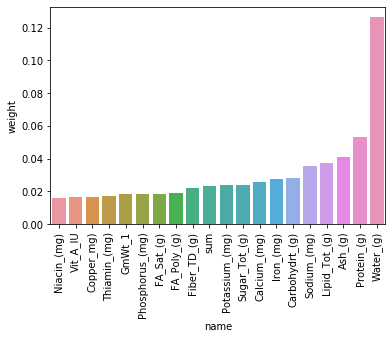

In [112]:
g = sns.barplot(x=importances.tail(20).name, y=importances.tail(20).weight)
plt.xticks(rotation=90)
g

In [0]:
answers = model.predict(test)

In [0]:
pd.DataFrame(answers).to_csv('Pred_main.csv',index=False)